In [ ]:
import pandas as pd

data = pd.read_csv('PyFstat_example_data/PyFstatExampleSimpleMCMCvsGridComparisonSemi/combined_mismatch_results.csv')
data

,mismatch,mf,mf1,mf2,df,df1,df2,run_id,mf_input,mf1_input,mf2_input,dF0_calculated,dF1_refined_calculated,dF2_refined_calculated
0,0.022547,0.144444,0.455556,0.0005,3.233599e-07,2.145147e-13,2.595317e-20,95,0.144444,0.455556,0.0005,3.233599e-07,2.145147e-13,2.595317e-20
1,0.170351,0.144444,0.455556,0.0005,3.233599e-07,2.145147e-13,2.595317e-20,95,0.144444,0.455556,0.0005,3.233599e-07,2.145147e-13,2.595317e-20
2,0.018121,0.144444,0.455556,0.0005,3.233599e-07,2.145147e-13,2.595317e-20,95,0.144444,0.455556,0.0005,3.233599e-07,2.145147e-13,2.595317e-20
3,0.049333,0.144444,0.455556,0.0005,3.233599e-07,2.145147e-13,2.595317e-20,95,0.144444,0.455556,0.0005,3.233599e-07,2.145147e-13,2.595317e-20
4,0.059258,0.144444,0.455556,0.0005,3.233599e-07,2.145147e-13,2.595317e-20,95,0.144444,0.455556,0.0005,3.233599e-07,2.145147e-13,2.595317e-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202995,0.217556,0.500000,0.500000,0.0005,6.016179e-07,2.247354e-13,2.595317e-20,500,0.500000,0.500000,0.0005,6.016179e-07,2.247354e-13,2.595317e-20
202996,0.090088,0.500000,0.500000,0.0005,6.016179e-07,2.247354e-13,2.595317e-20,500,0.500000,0.500000,0.0005,6.016179e-07,2.247354e-13,2.595317e-20
202997,0.073228,0.500000,0.500000,0.0005,6.016179e-07,2.247354e-13,2.595317e-20,500,0.500000,0.500000,0.0005,6.016179e-07,2.247354e-13,2.595317e-20
202998,0.144666,0.500000,0.500000,0.0005,6.016179e-07,2.247354e-13,2.595317e-20,500,0.500000,0.500000,0.0005,6.016179e-07,2.247354e-13,2.595317e-20


In [2]:
numbers = 500
num_workers = 14
tstart = 1000000000
duration = 120 * 86400
T_coh = 15 * 86400  # coherence time for the MCMC
nsegs = int(duration / T_coh)  # number of segments for the MCMC
Tsft = 1800
detectors = "H1,L1"
sqrtSX = 1e-22

gamma1 = 8
gamma2 = 20
DeltaF0_fixed = 9.885590880794127e-06 * 10
DeltaF1_fixed = 3.481585082097677e-12 * 10
DeltaF2_fixed = 6.357202196709655e-19 * 10



N_det = 2

N_can = 0

tau_Fbin = 6e-8
tau_fft = 3.3e-8
tau_spin = 7.5e-8
tau_bayes = 4.4e-8
tau_recalc = 0


ratio = 2

R = 1


tau_sumF = 7.28e-9 - 3.72e-10 * nsegs

tau_RS = tau_Fbin + ratio * (tau_fft + R * tau_spin)


In [3]:
data['Nf0'] = DeltaF0_fixed / data.dF0_calculated
data['Nf1'] = DeltaF1_fixed / data.dF1_refined_calculated * gamma1
data['Nf2'] = DeltaF2_fixed / data.dF1_refined_calculated * gamma2
data['N_coh'] = data['Nf0'] * data['Nf1'] * data['Nf2']
data['N_inc'] = data.N_coh * gamma1 * gamma2
data['runtime'] = nsegs * N_det * data.N_coh * tau_RS + nsegs * data.N_inc * tau_sumF + data.N_inc * tau_bayes + N_can * tau_recalc

In [4]:
data

,mismatch,mf,mf1,mf2,df,df1,df2,run_id,mf_input,mf1_input,mf2_input,dF0_calculated,dF1_refined_calculated,dF2_refined_calculated,Nf0,Nf1,Nf2,N_coh,N_inc,runtime
0,0.022547,0.144444,0.455556,0.0005,3.233599e-07,2.145147e-13,2.595317e-20,95,0.144444,0.455556,0.0005,3.233599e-07,2.145147e-13,2.595317e-20,305.714799,1298.404274,0.000593,235.269352,37643.096311,0.003991
1,0.170351,0.144444,0.455556,0.0005,3.233599e-07,2.145147e-13,2.595317e-20,95,0.144444,0.455556,0.0005,3.233599e-07,2.145147e-13,2.595317e-20,305.714799,1298.404274,0.000593,235.269352,37643.096311,0.003991
2,0.018121,0.144444,0.455556,0.0005,3.233599e-07,2.145147e-13,2.595317e-20,95,0.144444,0.455556,0.0005,3.233599e-07,2.145147e-13,2.595317e-20,305.714799,1298.404274,0.000593,235.269352,37643.096311,0.003991
3,0.049333,0.144444,0.455556,0.0005,3.233599e-07,2.145147e-13,2.595317e-20,95,0.144444,0.455556,0.0005,3.233599e-07,2.145147e-13,2.595317e-20,305.714799,1298.404274,0.000593,235.269352,37643.096311,0.003991
4,0.059258,0.144444,0.455556,0.0005,3.233599e-07,2.145147e-13,2.595317e-20,95,0.144444,0.455556,0.0005,3.233599e-07,2.145147e-13,2.595317e-20,305.714799,1298.404274,0.000593,235.269352,37643.096311,0.003991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202995,0.217556,0.500000,0.500000,0.0005,6.016179e-07,2.247354e-13,2.595317e-20,500,0.500000,0.500000,0.0005,6.016179e-07,2.247354e-13,2.595317e-20,164.316767,1239.354671,0.000566,115.213168,18434.106875,0.001955
202996,0.090088,0.500000,0.500000,0.0005,6.016179e-07,2.247354e-13,2.595317e-20,500,0.500000,0.500000,0.0005,6.016179e-07,2.247354e-13,2.595317e-20,164.316767,1239.354671,0.000566,115.213168,18434.106875,0.001955
202997,0.073228,0.500000,0.500000,0.0005,6.016179e-07,2.247354e-13,2.595317e-20,500,0.500000,0.500000,0.0005,6.016179e-07,2.247354e-13,2.595317e-20,164.316767,1239.354671,0.000566,115.213168,18434.106875,0.001955
202998,0.144666,0.500000,0.500000,0.0005,6.016179e-07,2.247354e-13,2.595317e-20,500,0.500000,0.500000,0.0005,6.016179e-07,2.247354e-13,2.595317e-20,164.316767,1239.354671,0.000566,115.213168,18434.106875,0.001955


In [10]:
# mean the mismatch and runtime for each 500 points
data_mean = data.groupby(['mf', 'mf1', 'mf2']).mean().reset_index()
data_mean = data_mean[['mismatch', 'runtime']]
data_mean

,mismatch,runtime
0,0.098331,0.003991
1,0.102674,0.003637
2,0.109231,0.003637
3,0.122495,0.003637
4,0.125895,0.003637
...,...,...
401,0.132698,0.001955
402,0.158418,0.001955
403,0.188424,0.001955
404,0.204303,0.001955


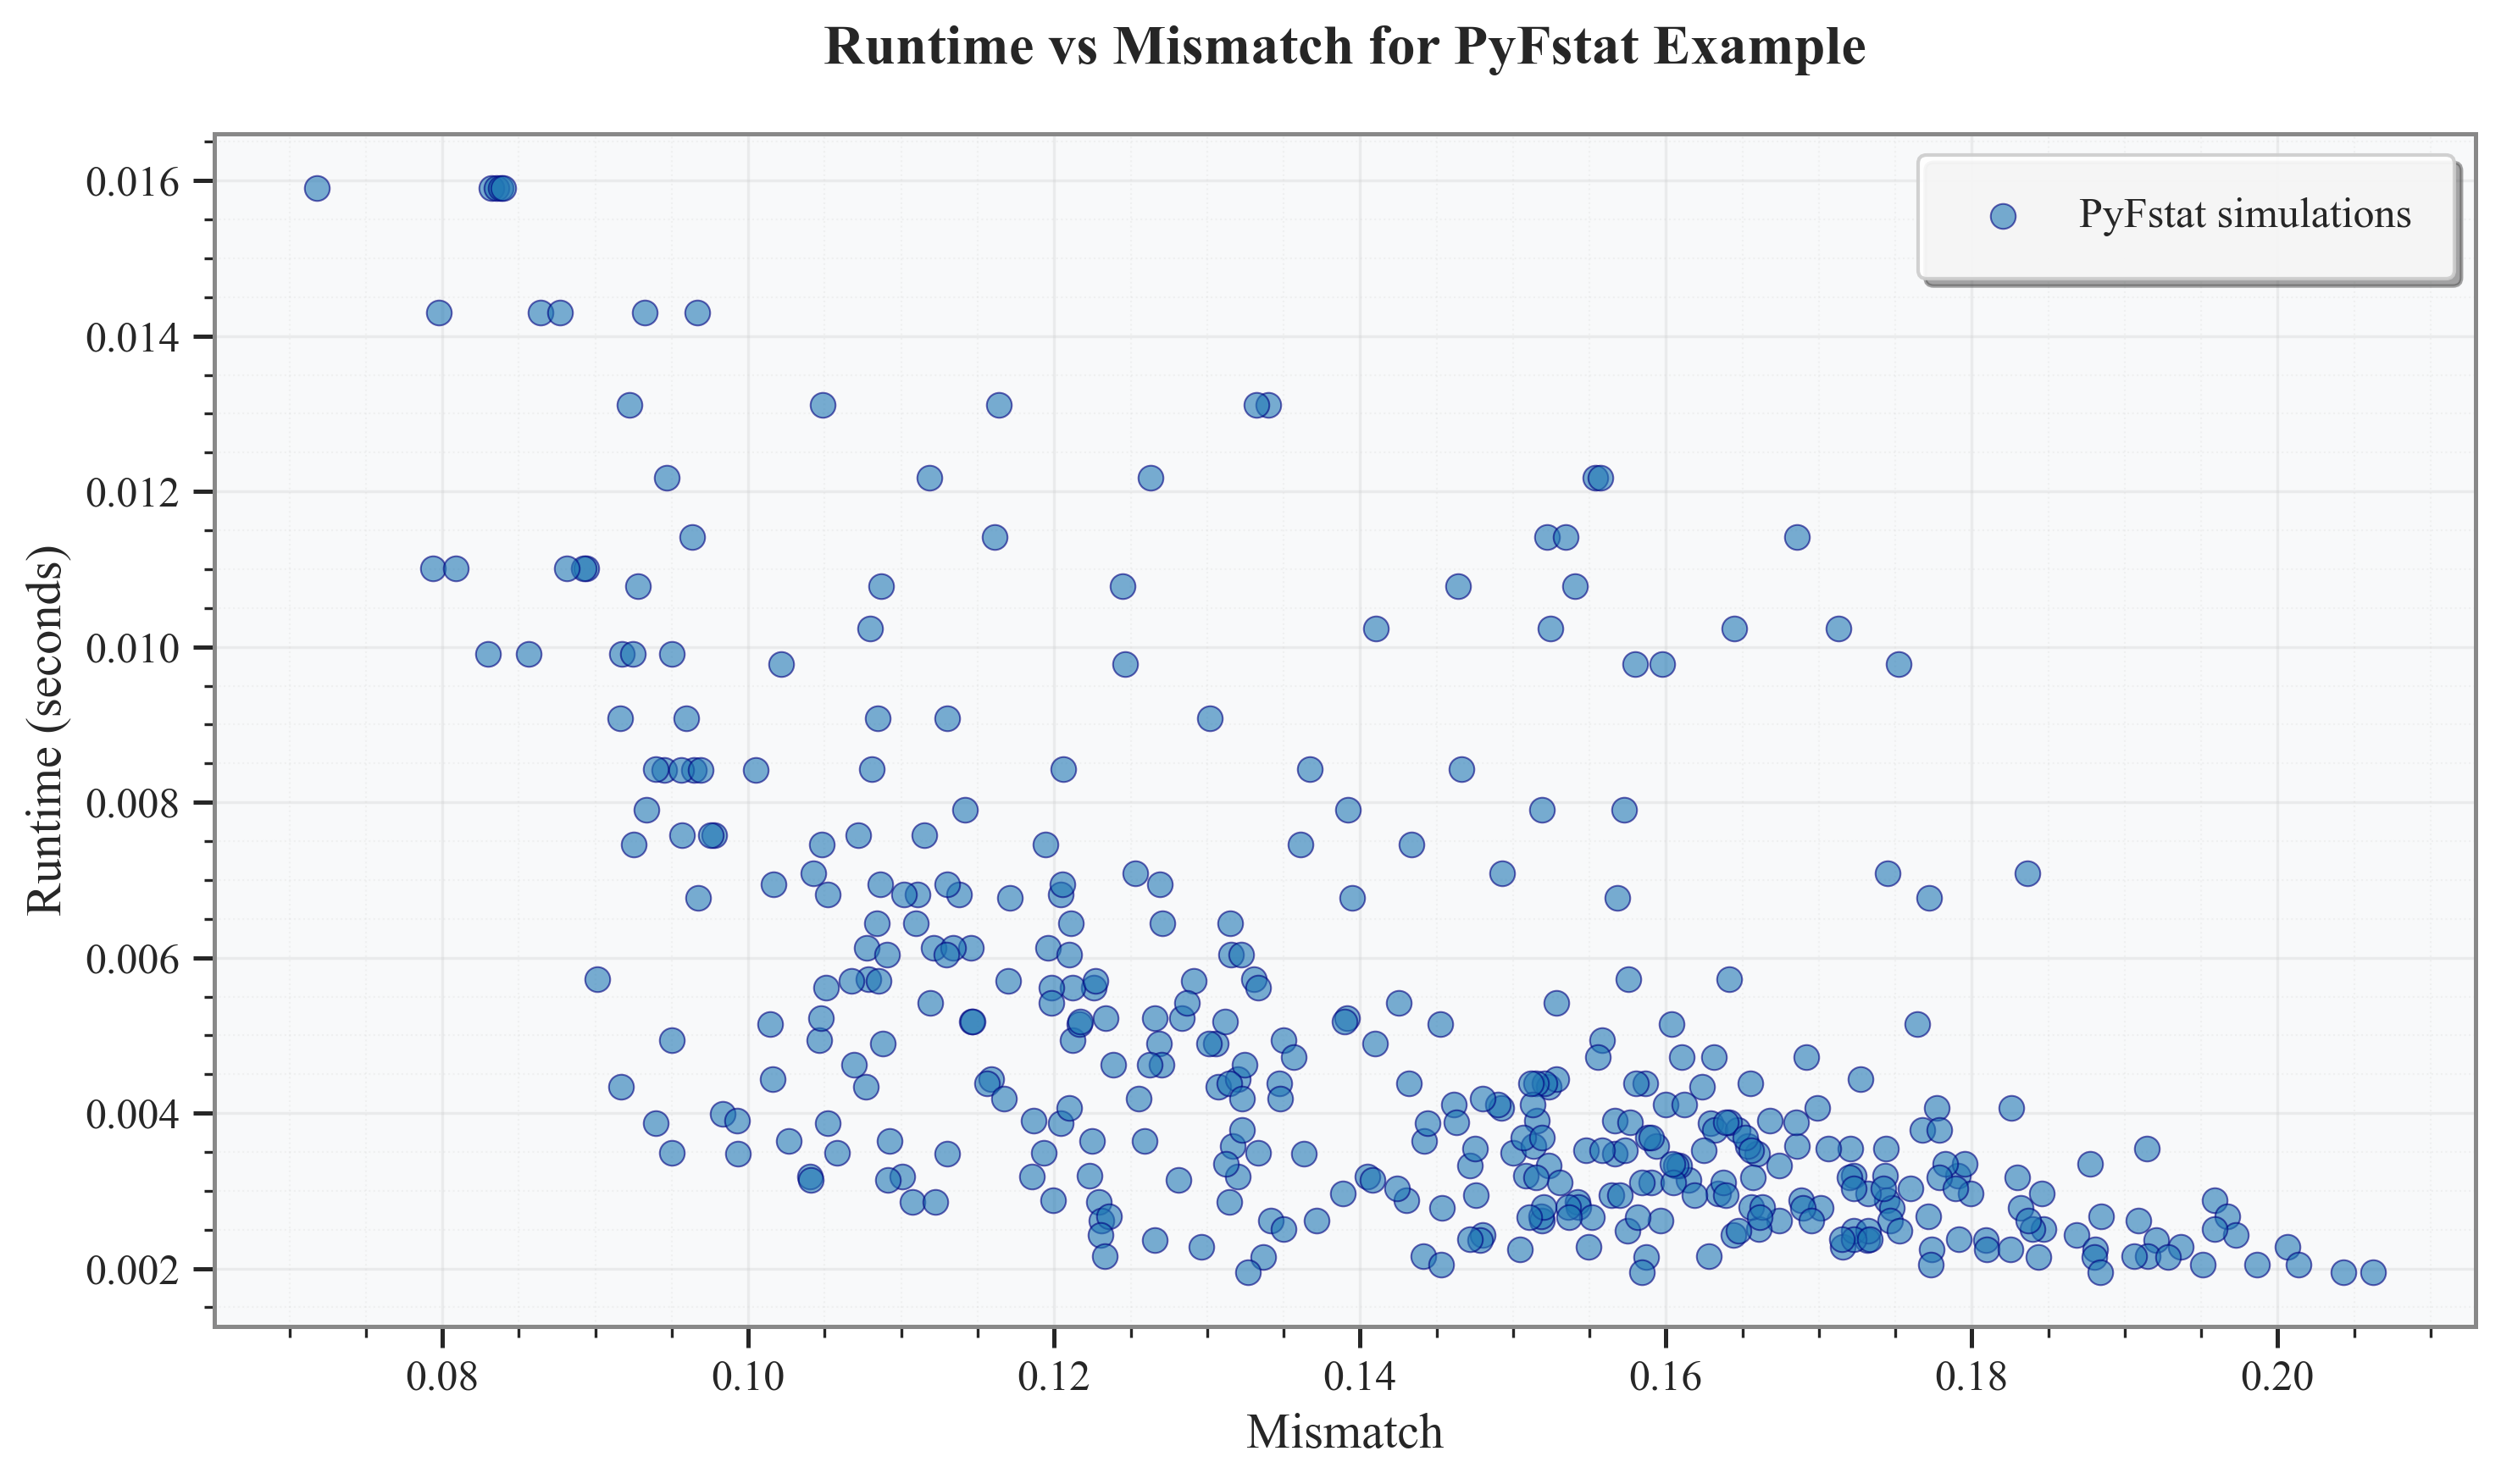

In [27]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Set the default font and style for publication quality
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12


# Create figure with specific size for publication
fig, ax = plt.subplots(figsize=(10, 6))

# Generate sample data (replace with your actual data)
# Note: In your actual implementation, use data_mean.mismatch and data_mean.runtime
np.random.seed(42)
# mismatch = np.random.uniform(0.07, 0.21, 500)
# runtime = np.exp(np.random.normal(-5, 0.7, 500))

# Create scatter plot with improved styling
scatter = ax.scatter(data_mean.mismatch, data_mean.runtime, 
                    alpha=0.6,                    # Add transparency
                    s=50,                         # Slightly smaller points
                    c='#1f77b4',                  # Professional blue color
                    edgecolors='navy',            # Add edge color
                    linewidth=0.5,                # Thin edge
                    label='PyFstat simulations')   # More descriptive label

# Set logarithmic scale for y-axis
# ax.set_yscale('log')
# ax.set_xscale('log')
# Improve axis labels with units if applicable
ax.set_xlabel('Mismatch', fontsize=14, fontweight='medium')
ax.set_ylabel('Runtime (seconds)', fontsize=14, fontweight='medium')

# Add title with proper formatting
ax.set_title('Runtime vs Mismatch for PyFstat Example', 
             fontsize=16, fontweight='bold', pad=20)

# Customize grid
ax.grid(True, which='major', linestyle='-', alpha=0.3, linewidth=0.8)
ax.grid(True, which='minor', linestyle=':', alpha=0.2, linewidth=0.5)

# Add minor ticks for better readability
ax.minorticks_on()

# Improve spine visibility
for spine in ax.spines.values():
    spine.set_edgecolor('#888888')
    spine.set_linewidth(1.2)

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=12, width=1.2, length=6)
ax.tick_params(axis='both', which='minor', width=0.8, length=3)

# Add a subtle background color
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

# Position legend optimally
ax.legend(loc='upper right', frameon=True, fancybox=True, 
          shadow=True, framealpha=0.9, borderpad=1)

# Set axis limits with some padding
# ax.set_xlim(0.065, 0.215)
# ax.set_ylim(5e-3, 5e-1)

# Add statistical annotation (optional)
# You can add mean/median lines or other statistical information
# median_runtime = np.median(runtime)
# ax.axhline(y=median_runtime, color='red', linestyle='--', 
#            linewidth=1, alpha=0.5, label=f'Median: {median_runtime:.3f}s')

# Tight layout for better spacing
plt.tight_layout()

# Save the figure in high resolution
plt.savefig('images/runtime_vs_mismatch.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('runtime_vs_mismatch.png', format='png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()
